# Начало

In [58]:
import sqlite3
import pandas as pd
cur = sqlite3.connect('golden.db')
df = pd.read_sql_query("SELECT * FROM golden", cur)
cur.close()

In [59]:
print(df)

                                                title  \
0   «Полис недоступности» и «красные зоны»: Правит...   
1   Лишение депутатских полномочий случилось на Ка...   
2   В районе улицы Толстого реконструкция дороги и...   
3      Владивостокская таможня – не место для заторов   
4   Глава Приморья освободил от должности руководи...   
..                                                ...   
58  Работница КГБУЗ “Красноармейская ЦРБ” восстано...   
59  «Битва» за 392 млн рублей «лесных» денег в При...   
60  Инжиниринговая «перепутаница» не «по-Чуковском...   
61  На Дальнем Востоке выявили 52 «чёрных кредитор...   
62  Очередное заседание Уссурийского местного отде...   

                                              content            category  \
0   Во Владивостоке прошло совещание, посвящённое ...  Политика;Экономика   
1   …И случилось не само по себе, а по иску прокур...      Закон;Политика   
2   Во Владивостоке активно продолжается политика ...   Политика;Репортаж   
3   О д

# Нормализация

In [60]:
import re
import nltk
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


In [61]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
stop_symb = set(['.', ' '])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Масленок\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_analyzer = MorphAnalyzer()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

In [63]:
def normalizer(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    
    normalized_tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in stop_words and token.lemma not in stop_symb:
            normalized_tokens.append(token.lemma)
    return ' '.join(normalized_tokens)

In [64]:
normalized_data = []
for i in range(len(df['content'])):
    temp = normalizer(df['content'][i])
    normalized_data.append(temp)

print(normalized_data)


['владивосток пройти совещание , посвятить транспортный проблема , председательство вице-губернатор николай стецко главный вопрос стать нахождение приморский край называть « красный зона » , российский союз автостраховщик ( рса ) включать регион , зафиксировать рост дтп больший сумма взыскание ущерб полис обязательный страхование автогражданский ответственность ( осаго ) из-за , регион ( наш случай это приморский край ) внести « красный зона » , страховой компания мочь уйти регион , приводить , около 5 год автовладелец приморье достаточно трудный приобрести полис осаго попытка сделать онлайн система показывать сбой , попытка купить полис страховой компания возникать « накрутка » услуга посредник 1,5-2 тысяча рубль , вариант давать возможность своевременно приобрести полис « автогражданка » страдать ситуация простой гражданин , представитель бизнес – транспортный компания фирма такси , например , председатель транспортный комитет приморский краевой отделение « опора россия » петр берг н

# Векторизация

In [65]:
vectorizer = TfidfVectorizer()

def vectoriz(text_norm):
    X = vectorizer.fit_transform(text_norm)
    vectorizer.get_feature_names_out()
    X.toarray()
    return X



In [66]:
vec = vectoriz(normalized_data)
print(vec)

  (0, 1841)	0.04282626460757316
  (0, 835)	0.04282626460757316
  (0, 1353)	0.03766917565007231
  (0, 1538)	0.04282626460757316
  (0, 927)	0.04282626460757316
  (0, 1179)	0.04282626460757316
  (0, 398)	0.02958006864589743
  (0, 4)	0.031172011946335537
  (0, 1874)	0.04282626460757316
  (0, 796)	0.08565252921514632
  (0, 171)	0.040865630380777174
  (0, 605)	0.08565252921514632
  (0, 1453)	0.03299210389947964
  (0, 736)	0.04282626460757316
  (0, 1906)	0.04282626460757316
  (0, 1539)	0.03766917565007231
  (0, 1256)	0.04282626460757316
  (0, 733)	0.04282626460757316
  (0, 1699)	0.04282626460757316
  (0, 174)	0.04282626460757316
  (0, 833)	0.04282626460757316
  (0, 915)	0.04282626460757316
  (0, 1643)	0.04282626460757316
  (0, 1922)	0.040865630380777174
  (0, 732)	0.04282626460757316
  :	:
  (61, 435)	0.08942105623203213
  (61, 880)	0.05617823174629677
  (61, 1591)	0.05617823174629677
  (61, 1019)	0.04878133445175935
  (61, 1890)	0.03857226732123896
  (61, 1760)	0.03857226732123896
  (61, 905

# Выделение двух компонентов

In [67]:
def two_components(Xe):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(Xe.toarray())
    return X_pca

In [68]:
result = two_components(vec)
print(result)

[[ 0.02418677 -0.09599591]
 [-0.50176177  0.06981837]
 [ 0.32932462  0.01625695]
 [-0.03715358  0.81885096]
 [-0.2971817  -0.13926934]
 [-0.25754667 -0.51938565]
 [ 0.7017198  -0.1591715 ]
 [ 0.02418677 -0.09599591]
 [-0.03715358  0.81885096]
 [ 0.7017198  -0.1591715 ]
 [-0.25754667 -0.51938565]
 [-0.2971817  -0.13926934]
 [-0.50176177  0.06981837]
 [ 0.32932462  0.01625695]
 [ 0.02418677 -0.09599591]
 [-0.25754667 -0.51938565]
 [ 0.32932462  0.01625695]
 [-0.03715358  0.81885096]
 [-0.50176177  0.06981837]
 [ 0.7017198  -0.1591715 ]
 [-0.2971817  -0.13926934]
 [ 0.02418677 -0.09599591]
 [-0.50176177  0.06981837]
 [ 0.7017198  -0.1591715 ]
 [-0.25754667 -0.51938565]
 [-0.2971817  -0.13926934]
 [-0.03715358  0.81885096]
 [ 0.32932462  0.01625695]
 [-0.25754667 -0.51938565]
 [-0.2971817  -0.13926934]
 [-0.03715358  0.81885096]
 [ 0.02418677 -0.09599591]
 [-0.50176177  0.06981837]
 [ 0.7017198  -0.1591715 ]
 [ 0.32932462  0.01625695]
 [ 0.00253738  0.01149025]
 [ 0.00253738  0.01149025]
 

# Кластеризация

In [69]:
dbscan = DBSCAN(eps=0.05, min_samples=2)
clusters = dbscan.fit_predict(result)


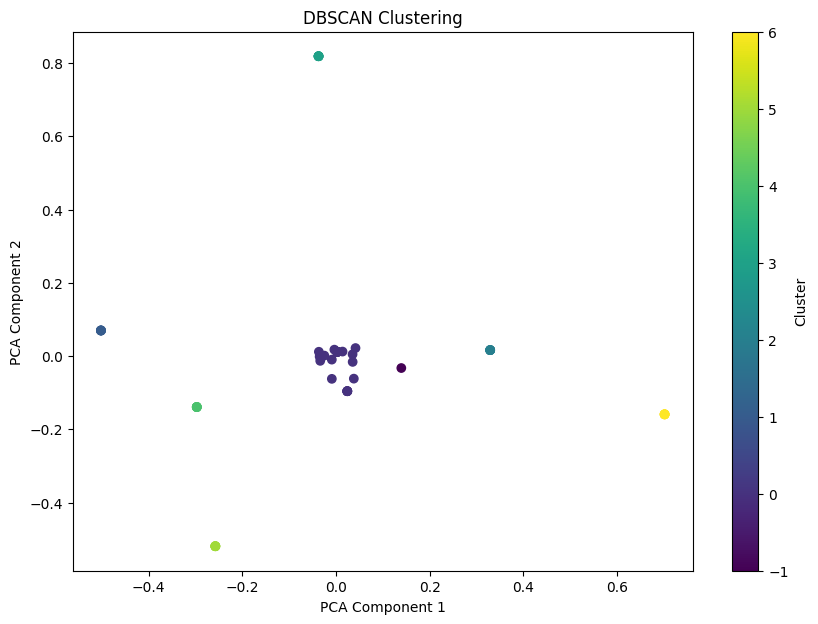

In [70]:
df_res = pd.DataFrame({'x': result[:, 0], 'y': result[:, 1], 'cluster': clusters})

plt.figure(figsize=(10, 7))
plt.scatter(df_res['x'], df_res['y'], c=df_res['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(result)
k_clusters = kmeans.predict([[0, 0], [12, 3]])

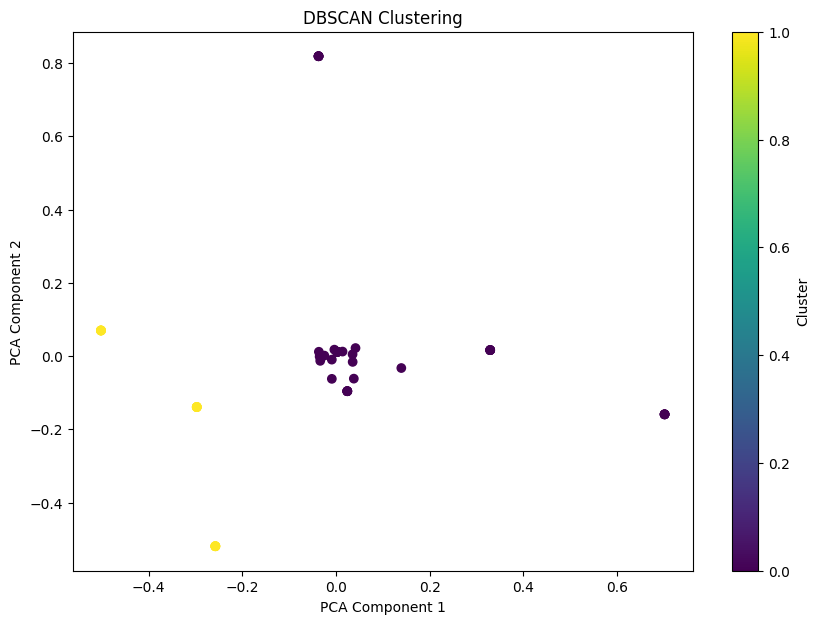

In [72]:
df_resk = pd.DataFrame({'x': result[:, 0], 'y': result[:, 1], 'cluster': kmeans.labels_})

plt.figure(figsize=(10, 7))
plt.scatter(df_resk['x'], df_resk['y'], c=df_resk['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Результаты анализа

In [75]:
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [df['title'][i] for i in range(len(clusters)) if clusters[i] == cluster]
    print(cluster_texts)

Cluster 0:
['«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', '«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', '«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', '«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', '«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', '“Лесное” дело о 392 млн рублей”: третье лицо может быть “немножечко экспертом”?', 'Бизнес-завтрак «ОПОРЫ РОССИИ» с главой Арсеньева помог ответить на вопросы о становлении туризма', 'В отношении арестованного в Приморье «белокостюмного» афериста возбуждено ещё одно уголовное дело в Хабаровске', 'Поставки морепродуктов из

In [76]:
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [df['title'][i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == cluster]
    print(cluster_texts)

Cluster 0:
['«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', 'В районе улицы Толстого реконструкция дороги и высаживание газона в ближайшее время приведёт к дорожному коллапсу', 'Владивостокская таможня – не место для заторов', 'Восьмой Восточный экономический форум пройдёт\xa0с 10 по 13 сентября', '«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', 'Владивостокская таможня – не место для заторов', 'Восьмой Восточный экономический форум пройдёт\xa0с 10 по 13 сентября', 'В районе улицы Толстого реконструкция дороги и высаживание газона в ближайшее время приведёт к дорожному коллапсу', '«Полис недоступности» и «красные зоны»: Правительство Приморья намерено обратиться в Центробанк России из-за «недоступного» ОСАГО', 'В районе улицы Толстого реконструкция дороги и высаживание газона в ближайшее время приведёт к дорожному колла